## Author: Partha Ghosal

# Project: – Linear Regression Project

#### Data Description:

##### Context:

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository.

##### Content:

1. Title: Auto-Mpg Data

2. Sources:
    (a) Origin: This dataset was taken from the StatLib library which is
    maintained at Carnegie Mellon University. 
    (b) The dataset was used in the 1983 American Statistical Association Exposition.    
    (c) Date: July 7, 1993
    
3. Past Usage:
    See 2b (above)
    Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
    In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
 
4. Relevant Information:This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute “mpg”, 8 of the original instances were removed because they had unknown values for the “mpg” attribute. The original dataset is available in the file “auto-mpg.data-original”.”The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.” (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:
    1. mpg: continuous
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued discrete
    8. origin: multi-valued discrete
    9. car name: string (unique for each instance)
    
8. Missing Attribute Values: horsepower has 6 missing values
    


##### Acknowledgements:

    Dataset: UCI Machine Learning Repository
    Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

##### Expectation:

    Build a Linear Regression Model to express the relationship between a car’s “mpg” and the rest of the attributes given in the dataset.   


### Project Execution Details Step-wise

In [1]:
# 1. importing the necessary libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# 2. Reading the data as data frame
cData = pd.read_csv("C:\\Users\\EPAAGHL\\Documents\\Personal\\auto-mpg.csv")

In [4]:
# Viewing the data
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### 3. Performing basic EDA on the data
##### 3.1 Shape of the data

In [5]:
cData.shape

(398, 9)

##### 3.2 Data Type of each attribute

In [6]:
cData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

##### 3.3 Plotting mpg against the other key variables to view their correlation if any

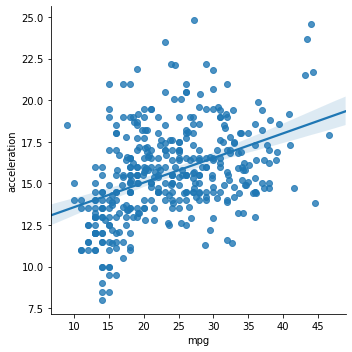

In [7]:
# Plotting mpg against acceleration, with the regression line on
sns.lmplot(x='mpg', y='acceleration', data=cData) 
plt.show()


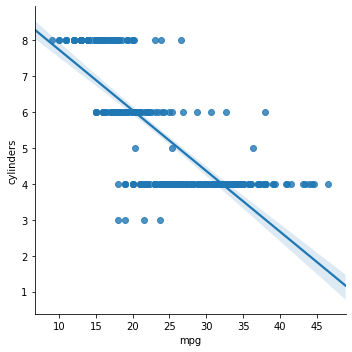

In [8]:
# Plotting mpg against acceleration
sns.lmplot(x='mpg', y='cylinders', data=cData)
plt.show()

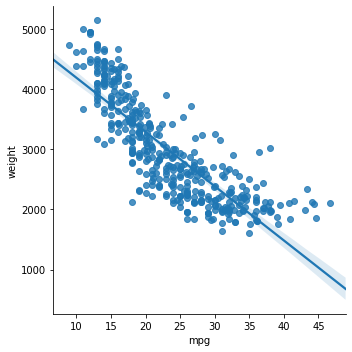

In [10]:
# Plotting mpg against weight
sns.lmplot(x='mpg', y='weight', data=cData)
plt.show()

# Observation : Negative correlation is being shown in the plot betweej weight and mpg


#### 4. Recalibrating the data to fit the final goal

In [37]:
# Check the head to view the data
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
#dropping/ignoring car_name
df = cData.drop('car name', axis=1)

In [13]:
# Replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [14]:
#Converting categorical variables into dummy numerical variables so that machine learning algorithm can be built
df = pd.get_dummies(df, columns=['origin'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [15]:
# Checking for presence of null values in the columns
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [16]:
# Checking the data types of the columns for further investigation
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [17]:
# perform isdigit() on 'horsepower' as its datatype is showing as object
digits_in_hp = pd.DataFrame(df.horsepower.str.isdigit())  # returns True if digits else False
#print isDigit = False!
df[digits_in_hp['horsepower'] == False]   #  only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [21]:
# Replace the missing values with NaN

df= df.replace('?', np.nan)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [22]:
# For taking care of missing values, we would replace the missing values with the median of each column(if any)

df = df.fillna(df.median())

In [23]:
# Now since we have replace NaN with numeric values, we can convert the hp column from object / string type to float
df['horsepower'] = df['horsepower'].astype('float64')

In [24]:
# Checking the datatypes again after the conversion
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_america      int64
origin_asia         int64
origin_europe       int64
dtype: object

From the above we can find that the datatype of horesepower has been converted from object to float64

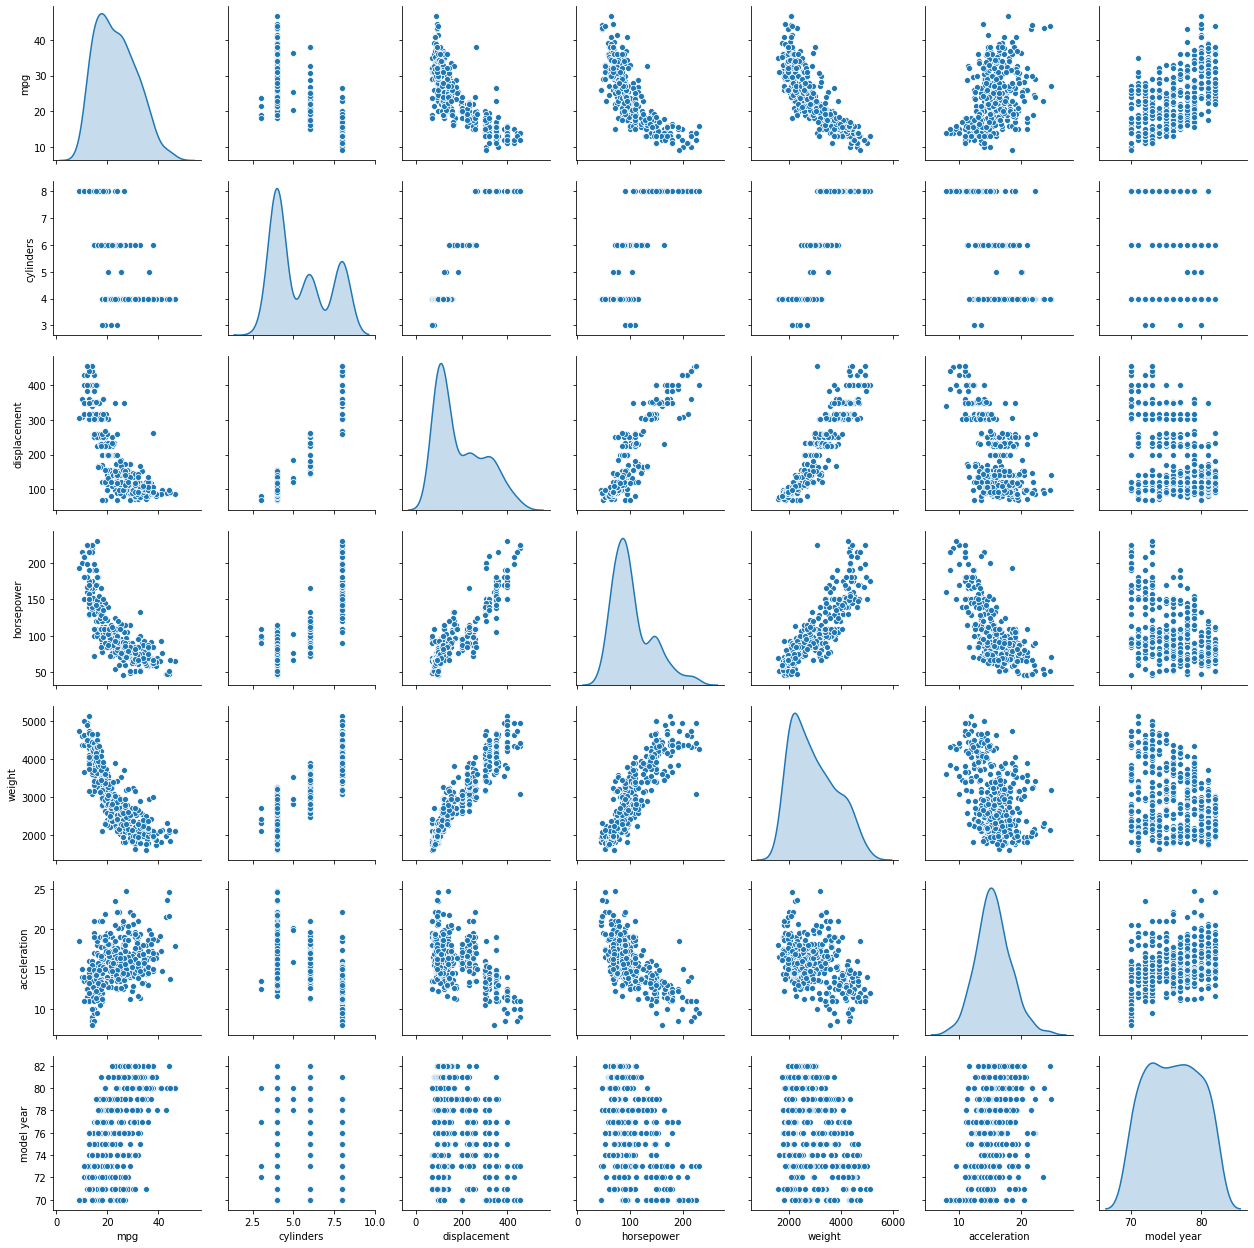

In [25]:
# Now a bivariate analysis among the different variables can be done using scatter matrix plot.
attr_select = df.iloc[:, 0:7]
sns.pairplot(attr_select, diag_kind='kde') 

Observation between 'mpg' and other attributes indicate the relationship is not really linear.

#### 5. Building Our Linear Model



In [26]:
# First Step: Divide Data into dependent and independent variables
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [27]:
# independent variables
X = df.drop(['mpg','origin_europe'], axis=1)
# dependent variable
y = df[['mpg']]

In [28]:
# Second Step: Splitting X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [29]:
# Third Step: Fitting the Linear Model (making our model learn)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regression_model.coef_

array([[-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
         0.83693389, -3.001283  , -0.60601796]])

In [31]:
# The coefficients for each variable and the intercept are
for indx, col_name in enumerate(X_train.columns):
    print("Coefficient of {} is {}".format(col_name, regression_model.coef_[0][indx]))

Coefficient of cylinders is -0.3948079661648215
Coefficient of displacement is 0.0289455107654872
Coefficient of horsepower is -0.021752207723546583
Coefficient of weight is -0.007352032065147354
Coefficient of acceleration is 0.061919366007619644
Coefficient of model year is 0.8369338917644997
Coefficient of origin_america is -3.0012830009185167
Coefficient of origin_asia is -0.6060179643247362


In [32]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372152


In [33]:
# The score (R^2) for in-sample and out of sample
regression_model.score(X_train, y_train)

0.8141025501610559

In [34]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8433135132808834

In [35]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
174,6,171.0,97.0,2984,14.5,75,1,0
359,4,141.0,80.0,3230,20.4,81,0,0
250,8,318.0,140.0,3735,13.2,78,1,0
274,5,131.0,103.0,2830,15.9,78,0,0
283,6,232.0,90.0,3265,18.2,79,1,0
...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,0,1
39,8,400.0,175.0,4464,11.5,71,1,0
171,4,134.0,96.0,2702,13.5,75,0,1
271,4,156.0,105.0,2745,16.7,78,1,0


In [36]:
regression_model.predict(X_test)

array([[20.91554528],
       [27.78619415],
       [20.35450492],
       [26.7530043 ],
       [24.34440311],
       [15.94627895],
       [29.61711144],
       [34.54999717],
       [17.08487642],
       [10.56570744],
       [30.27190054],
       [16.46101954],
       [22.34949158],
       [27.36817515],
       [36.4916326 ],
       [23.52414572],
       [10.95688403],
       [20.15994355],
       [ 9.06847316],
       [33.03329847],
       [25.97760019],
       [32.32715763],
       [20.84295791],
       [25.08512814],
       [25.67024575],
       [30.00444827],
       [32.58061387],
       [32.5462297 ],
       [15.1314045 ],
       [30.17173763],
       [27.18513498],
       [11.04447745],
       [21.28330056],
       [28.68243423],
       [24.88266353],
       [13.63888896],
       [26.37838591],
       [ 9.21013918],
       [31.6904227 ],
       [23.85386165],
       [23.89949396],
       [24.41984635],
       [21.05348912],
       [34.13688229],
       [25.91853825],
       [22

#### The R-squared for the regression model on the left is 15%, and for the model on the right it is 84%.
